In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ITERATION_COUNT = 200.0

In [3]:
color_psu_nittany_navy = '#001e44'
color_psu_beaver_blue = '#1e407c'
color_psu_pugh_blue = '#96bee6'

color_psu_white_out = '#ffffff'

In [4]:
def won(df):
    return df[df['Max Tile'] > 1024]

# Plotting

In [5]:
def line_plot(x, y):
    xs = [str(xi) for xi in x]
    fig, ax1 = plt.subplots()
    fig.set_figwidth(6)
    fig.set_figheight(3)
    
    l1 = ax1.plot(xs, y, color = color_psu_beaver_blue)

    plt.tick_params(axis='y', colors='dimgrey')
    plt.tick_params(axis='x', colors='dimgrey')

    for pos in ['right', 'top', 'left']:
        plt.gca().spines[pos].set_visible(False)
        
    plt.grid(axis = 'y', color = 'lightgrey')
    plt.show()

In [6]:
def bar_chart(x, y):
    fig, ax1 = plt.subplots()
    fig.set_figwidth(6)
    fig.set_figheight(3)

    colors = [
        color_psu_beaver_blue,
        color_psu_pugh_blue,        
        color_psu_nittany_navy,
    ]

    for pos in ['right', 'top', 'left']:
        plt.gca().spines[pos].set_visible(False)
    
    for i in range(0, len(y)):
        yi = y[i]
        ax1.bar(i * 1, yi, color = colors[i])

    xticks = [i * 1 for i in range(0, len(x))]
    ax1.set_xticks(xticks, x)

    plt.grid(axis = 'y', color = 'lightgrey')
    plt.show()

# Data Load

In [7]:
df_random = pd.read_csv('./data/results-random.csv')
df_expectimax_2 = pd.read_csv('./data/results-expectimax-5444-2.csv')
df_expectimax_3 = pd.read_csv('./data/results-expectimax-5444-3.csv')
df_expectimax_4 = pd.read_csv('./data/results-expectimax-5444-4.csv')
df_expectimax_5 = pd.read_csv('./data/results-expectimax-5444-5.csv')
df_mcts_24 = pd.read_csv('./data/results-mcts-4440-24.csv')
df_mcts_48 = pd.read_csv('./data/results-mcts-4440-48.csv')
df_mcts_96 = pd.read_csv('./data/results-mcts-4440-96.csv')
df_mcts_144 = pd.read_csv('./data/results-mcts-4440-144.csv')

In [8]:
df_expectimax_eval = pd.read_csv('./data/eval-expectimax-3.csv').set_axis(['id', '0', '1', '2', '3', 'avg_max', 'max', 'avg_its', 'max_its'], axis = 1).set_index(['id'])
df_mcts_eval = pd.read_csv('./data/eval-mcts-48.csv').set_axis(['id', '0', '1', '2', '3', 'avg_max', 'max', 'avg_its', 'max_its'], axis = 1).set_index(['id'])

# Evaluation Function Fitting

## Number of functions that won

In [9]:
df_expectimax_eval[df_expectimax_eval['max'] > 1024].count()['0']

np.int64(5)

In [10]:
df_mcts_eval[df_mcts_eval['max'] > 1024].count()['0']

np.int64(15)

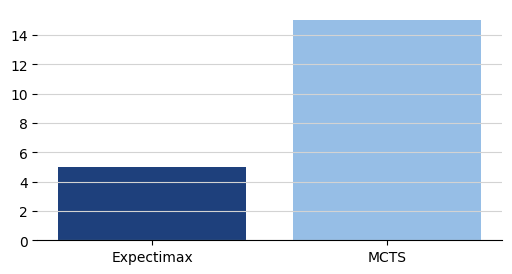

In [11]:
bar_chart(["Expectimax", "MCTS"], [
    df_expectimax_eval[df_expectimax_eval['max'] > 1024].count()['0'],
    df_mcts_eval[df_mcts_eval['max'] > 1024].count()['0']
])

## Best function powers of 2

As defined by achieving the mighest average number of iterations

In [12]:
df_expectimax_eval.sort_values(['avg_its'], ascending = False).iloc[0]

0             5.000000
1             4.000000
2             4.000000
3             4.000000
avg_max     938.666667
max        1024.000000
avg_its     278.625000
max_its     911.000000
Name: 1037, dtype: float64

In [13]:
df_mcts_eval.sort_values(['avg_its'], ascending = False).iloc[0]

0             4.000000
1             4.000000
2             4.000000
3             0.000000
avg_max    1109.333333
max        2048.000000
avg_its     351.250000
max_its    1674.000000
Name: 1032, dtype: float64

# Wins

In [14]:
won(df_random).count()['Max Tile']

np.int64(0)

In [15]:
(	
    won(df_expectimax_2).count()['Max Tile'],    
    won(df_expectimax_3).count()['Max Tile'],    
    won(df_expectimax_4).count()['Max Tile'],    
    won(df_expectimax_5).count()['Max Tile'],    
    
)

(np.int64(0), np.int64(1), np.int64(1), np.int64(3))

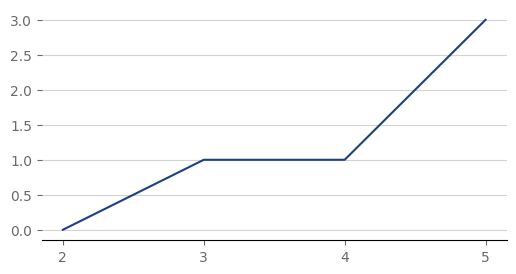

In [16]:
x = [2, 3, 4, 5]
y = [
    won(df_expectimax_2).count()['Max Tile'],    
    won(df_expectimax_3).count()['Max Tile'],    
    won(df_expectimax_4).count()['Max Tile'],    
    won(df_expectimax_5).count()['Max Tile'],   
]

line_plot(x, y)

In [17]:
(	
    won(df_mcts_24).count()['Max Tile'],
    won(df_mcts_48).count()['Max Tile'],
    won(df_mcts_96).count()['Max Tile'],    
    won(df_mcts_144).count()['Max Tile'],    
)

(np.int64(0), np.int64(3), np.int64(15), np.int64(14))

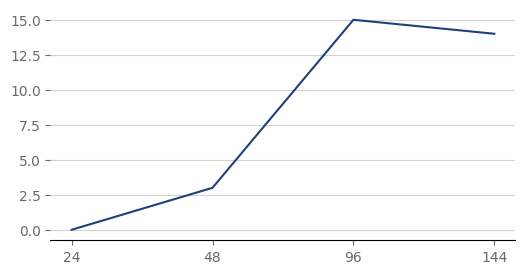

In [18]:
x = [24, 48, 96, 144]
y = [
    won(df_mcts_24).count()['Max Tile'],    
    won(df_mcts_48).count()['Max Tile'],    
    won(df_mcts_96).count()['Max Tile'],    
    won(df_mcts_144).count()['Max Tile'],   
]

line_plot(x, y)

# Avg iterations

In [19]:
df_random['Iterations'].mean()

np.float64(119.055)

In [20]:
(
    df_expectimax_2['Iterations'].mean(),
    df_expectimax_3['Iterations'].mean(),
    df_expectimax_4['Iterations'].mean(),
    df_expectimax_5['Iterations'].mean(),
)

(np.float64(388.03),
 np.float64(547.18),
 np.float64(465.55),
 np.float64(630.165))

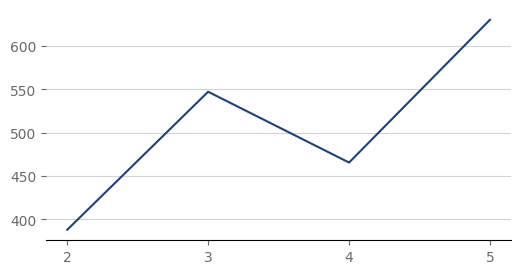

In [21]:
x = [2, 3, 4, 5]
y = [
    df_expectimax_2['Iterations'].mean(),
    df_expectimax_3['Iterations'].mean(),
    df_expectimax_4['Iterations'].mean(),
    df_expectimax_5['Iterations'].mean(), 
]

line_plot(x, y)

In [22]:
(
    df_mcts_24['Iterations'].mean(),
    df_mcts_48['Iterations'].mean(),
    df_mcts_96['Iterations'].mean(),
    df_mcts_144['Iterations'].mean(),   
)

(np.float64(489.45),
 np.float64(601.735),
 np.float64(694.93),
 np.float64(727.47))

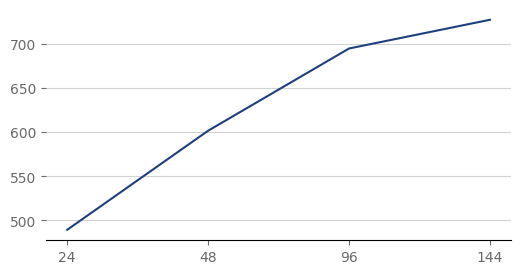

In [23]:
x = [24, 48, 96, 144]
y = [
    df_mcts_24['Iterations'].mean(),
    df_mcts_48['Iterations'].mean(),
    df_mcts_96['Iterations'].mean(),
    df_mcts_144['Iterations'].mean(),
]

line_plot(x, y)

# Avg time (s) per iteration

In [24]:
(
    sum((df_expectimax_2['Time (s)'] / df_expectimax_2['Iterations']).values) / ITERATION_COUNT,
    sum((df_expectimax_3['Time (s)'] / df_expectimax_3['Iterations']).values) / ITERATION_COUNT,
    sum((df_expectimax_4['Time (s)'] / df_expectimax_4['Iterations']).values) / ITERATION_COUNT,
    sum((df_expectimax_5['Time (s)'] / df_expectimax_5['Iterations']).values) / ITERATION_COUNT,    
)   

(np.float64(0.0010976360799154002),
 np.float64(0.011309717347326775),
 np.float64(0.050585299867260874),
 np.float64(0.524632865478692))

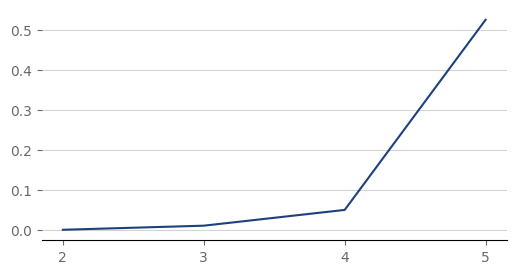

In [25]:
x = [2, 3, 4, 5]
y = [
    sum((df_expectimax_2['Time (s)'] / df_expectimax_2['Iterations']).values) / ITERATION_COUNT,
    sum((df_expectimax_3['Time (s)'] / df_expectimax_3['Iterations']).values) / ITERATION_COUNT,
    sum((df_expectimax_4['Time (s)'] / df_expectimax_4['Iterations']).values) / ITERATION_COUNT,
    sum((df_expectimax_5['Time (s)'] / df_expectimax_5['Iterations']).values) / ITERATION_COUNT,   
]

line_plot(x, y)

In [26]:
(
    sum((df_mcts_24['Time (s)'] / df_mcts_24['Iterations']).values) / ITERATION_COUNT,
    sum((df_mcts_48['Time (s)'] / df_mcts_48['Iterations']).values) / ITERATION_COUNT,
    sum((df_mcts_96['Time (s)'] / df_mcts_96['Iterations']).values) / ITERATION_COUNT,
    sum((df_mcts_144['Time (s)'] / df_mcts_144['Iterations']).values) / ITERATION_COUNT,    
)   

(np.float64(0.03755861461590695),
 np.float64(0.07479495816703109),
 np.float64(0.1499709580132559),
 np.float64(0.23188183860149908))

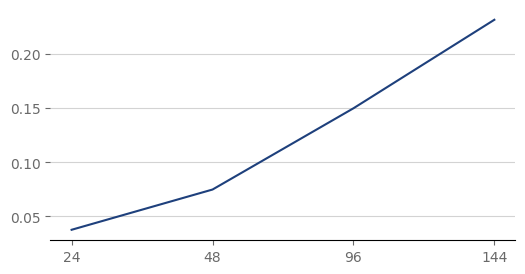

In [27]:
x = [24, 48, 96, 144]
y = [
    sum((df_mcts_24['Time (s)'] / df_mcts_24['Iterations']).values) / ITERATION_COUNT,
    sum((df_mcts_48['Time (s)'] / df_mcts_48['Iterations']).values) / ITERATION_COUNT,
    sum((df_mcts_96['Time (s)'] / df_mcts_96['Iterations']).values) / ITERATION_COUNT,
    sum((df_mcts_144['Time (s)'] / df_mcts_144['Iterations']).values) / ITERATION_COUNT,    
]

line_plot(x, y)

# Avg time (s) to win

In [28]:
(
    won(df_expectimax_2)['Time (s)'].mean(),
    won(df_expectimax_3)['Time (s)'].mean(),
    won(df_expectimax_4)['Time (s)'].mean(),
    won(df_expectimax_5)['Time (s)'].mean(),    
)

(nan, np.float64(13.8077), np.float64(51.9606), np.float64(489.5878666666667))

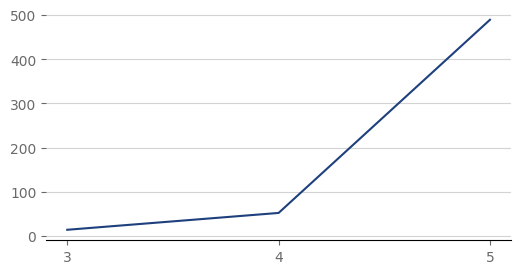

In [38]:
x = [2, 3, 4, 5]
y = [
    won(df_expectimax_2)['Time (s)'].mean(),
    won(df_expectimax_3)['Time (s)'].mean(),
    won(df_expectimax_4)['Time (s)'].mean(),
    won(df_expectimax_5)['Time (s)'].mean(),    
]

line_plot(x, y)

In [29]:
(
    won(df_mcts_24)['Time (s)'].mean(),    
    won(df_mcts_48)['Time (s)'].mean(),
    won(df_mcts_96)['Time (s)'].mean(),
    won(df_mcts_144)['Time (s)'].mean()
)

(nan,
 np.float64(85.76943333333334),
 np.float64(171.32769333333331),
 np.float64(286.75197142857144))

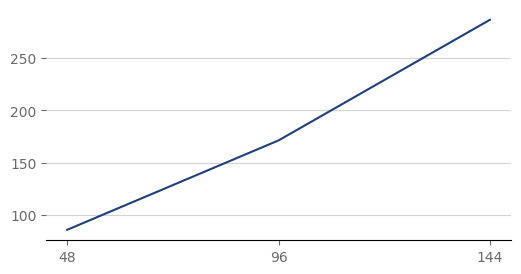

In [39]:
x = [24, 48, 96, 144]
y = [
    won(df_mcts_24)['Time (s)'].mean(),    
    won(df_mcts_48)['Time (s)'].mean(),
    won(df_mcts_96)['Time (s)'].mean(),
    won(df_mcts_144)['Time (s)'].mean()
]

line_plot(x, y)

# Avg iterations to win

In [30]:
(
    won(df_expectimax_2)['Iterations'].mean(),
    won(df_expectimax_3)['Iterations'].mean(),
    won(df_expectimax_4)['Iterations'].mean(),    
    won(df_expectimax_5)['Iterations'].mean()
)

(nan, np.float64(1413.0), np.float64(1397.0), np.float64(1249.6666666666667))

In [31]:
(
    won(df_mcts_24)['Iterations'].mean(),    
    won(df_mcts_48)['Iterations'].mean(),
    won(df_mcts_96)['Iterations'].mean(),
    won(df_mcts_144)['Iterations'].mean()
)

(nan,
 np.float64(1340.0),
 np.float64(1293.7333333333333),
 np.float64(1415.857142857143))

In [32]:
x = [24, 48, 96, 144]
y = [
    won(df_mcts_24)['Iterations'].mean(),
    won(df_mcts_48)['Iterations'].mean(),
    won(df_mcts_96)['Iterations'].mean(),
    won(df_mcts_144)['Iterations'].mean()
]

# Avg max tiles

In [33]:
df_random['Max Tile'].mean()

np.float64(108.88)

In [34]:
(
    df_expectimax_2['Max Tile'].mean(),
    df_expectimax_3['Max Tile'].mean(),
    df_expectimax_4['Max Tile'].mean(),
    df_expectimax_5['Max Tile'].mean(),    
)

(np.float64(444.8), np.float64(662.4), np.float64(556.16), np.float64(786.56))

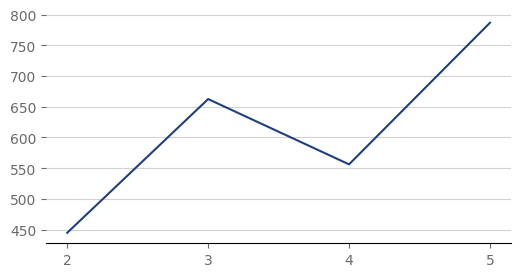

In [35]:
x = [2, 3, 4, 5]
y = [
    df_expectimax_2['Max Tile'].mean(),
    df_expectimax_3['Max Tile'].mean(),
    df_expectimax_4['Max Tile'].mean(),
    df_expectimax_5['Max Tile'].mean(),    
]

line_plot(x, y)

In [36]:
(
    df_mcts_24['Max Tile'].mean(),
    df_mcts_48['Max Tile'].mean(),
    df_mcts_96['Max Tile'].mean(),
    df_mcts_144['Max Tile'].mean(),    
)

(np.float64(602.24),
 np.float64(724.48),
 np.float64(869.76),
 np.float64(880.32))

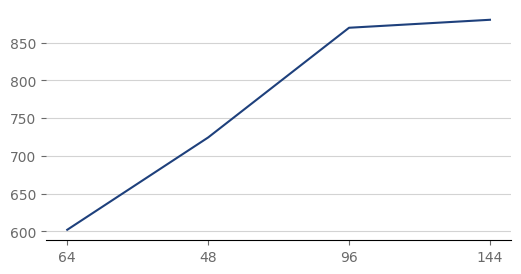

In [37]:
x = [64, 48, 96, 144]
y = [
    df_mcts_24['Max Tile'].mean(),
    df_mcts_48['Max Tile'].mean(),
    df_mcts_96['Max Tile'].mean(),
    df_mcts_144['Max Tile'].mean(),    
]

line_plot(x, y)